In [1]:
# Module imports
# import modules for use below
# (Note: Modules specific to particular machine learning examples are imported in the relevant code block)
# 'as' allows use of an abbreviated module name
import matplotlib.pyplot as plt     # Matplotlib for low-level plot details
import numpy as np                  # NumPy for fast numeric operations
import pandas as pd                 # Pandas for datasets
import seaborn as sns               # Seaborn for easier plotting

In [2]:
from google.colab import files  # uncomment if using colab
uploades = files.upload()  # uncomment if using colab

# Mounting this notebook to google drive #only uncomment if above does not work
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
#Read the data into a pandas dataframe for further analysis
from google.colab import files  # uncomment if using colab
uploades = files.upload()  # uncomment if using colab

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-additional.csv', sep=';') #read the bank dataset from the google drive directory

Saving bank-additional.csv to bank-additional.csv
Mounted at /content/drive


Saving bank-additional.csv to bank-additional (1).csv


In [3]:
category_list = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous','poutcome']

for x in category_list:
  print('Missing values?')
  print(df[x].isnull().values.any())

  # Count of unique values
  print('Count of unique values')
  print(f'{df[x].value_counts()}\n')

Missing values?
False
Count of unique values
cellular     2652
telephone    1467
Name: contact, dtype: int64

Missing values?
False
Count of unique values
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64

Missing values?
False
Count of unique values
thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

Missing values?
False
Count of unique values
77      24
112     23
73      22
81      21
122     20
        ..
568      1
776      1
433      1
440      1
1386     1
Name: duration, Length: 828, dtype: int64

Missing values?
False
Count of unique values
1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
17      14
13      11
16       7
14       6
15       2
22       2
19       2
23       2
29       2
27       1
18       1
24       1
35       1
Name: campaign, dtype: int64

Missin

In [4]:
df['poutcome_new'] = df["poutcome"].replace({"success": 1, "nonexistent": 0, "failure": 0})
print(df['poutcome_new'].value_counts())
df.head(n=10)

0    3977
1     142
Name: poutcome_new, dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_new
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0


In [5]:
df.drop(['poutcome',  ], axis=1, inplace=True)

In [6]:
df['y_encoded'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
df.head(n=10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_new,y_encoded
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,-1.8,92.893,-46.2,1.313,5099.1,no,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,1.1,93.994,-36.4,4.855,5191.0,no,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,1.4,94.465,-41.8,4.962,5228.1,no,0,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,1.4,94.465,-41.8,4.959,5228.1,no,0,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,999,2,-1.1,94.199,-37.5,0.884,4963.6,no,0,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,999,0,-1.1,94.199,-37.5,0.879,4963.6,no,0,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,999,0,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,999,1,-0.1,93.200,-42.0,4.153,5195.8,no,0,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,999,0,1.1,93.994,-36.4,4.855,5191.0,no,0,0


In [7]:
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan'  ], axis=1, inplace=True)

In [8]:
y = df['y_encoded'].copy()
X = df.copy()


In [9]:
X.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_new,y_encoded
0,30,cellular,may,fri,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,no,0,0
1,39,telephone,may,fri,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,no,0,0
2,25,telephone,jun,wed,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,no,0,0
3,38,telephone,jun,fri,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,no,0,0
4,47,cellular,nov,mon,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,no,0,0


In [10]:
df.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous' ], axis=1, inplace=True)

In [11]:
excluded_columns = ['y', 'y_encoded']
X_final = df.drop(excluded_columns, axis=1)
X_final

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_new
0,30,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1.4,94.465,-41.8,4.962,5228.1,0
3,38,1.4,94.465,-41.8,4.959,5228.1,0
4,47,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...
4114,30,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,1.4,93.444,-36.1,4.966,5228.1,0


In [12]:
X_final.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_new
0,30,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1.4,94.465,-41.8,4.962,5228.1,0
3,38,1.4,94.465,-41.8,4.959,5228.1,0
4,47,-0.1,93.200,-42.0,4.191,5195.8,0


In [13]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: y_encoded, dtype: int64

In [14]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: y_encoded
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB
None


In [15]:
  print('Count of unique values')
  print(f'{y.value_counts()}\n')

Count of unique values
0    3668
1     451
Name: y_encoded, dtype: int64



In [16]:
# Training and Test Data
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Setting random_state means the split will always be the same which sometimes is useful.
X_train, X_test, y_train, y_test =\
    train_test_split(X_final, y, test_size=0.3, random_state=12345)

# Output the dimensions of each of the sets
print(f"X_train is {X_train.shape}")
print(f"X_test is {X_test.shape}")
print(f"y_train is {y_train.shape}")
print(f"y_test is {y_test.shape}")


X_train is (2883, 7)
X_test is (1236, 7)
y_train is (2883,)
y_test is (1236,)


In [17]:
X_train.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_new
4114,30,1.4,93.918,-42.7,4.958,5228.1,0
2836,43,1.4,93.444,-36.1,4.968,5228.1,0
531,34,1.4,93.918,-42.7,4.962,5228.1,0
3536,30,-0.1,93.200,-42.0,4.153,5195.8,0
3573,24,-1.8,92.893,-46.2,1.244,5099.1,0


In [18]:
X_test.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_new
508,30,1.4,93.444,-36.1,4.964,5228.1,0
2360,50,1.4,94.465,-41.8,4.864,5228.1,0
3810,53,-2.9,92.201,-31.4,0.838,5076.2,1
2139,56,-2.9,92.201,-31.4,0.883,5076.2,1
92,44,1.4,94.465,-41.8,4.961,5228.1,0


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_encoded, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Setup a Decision Tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=20, min_samples_split=2, random_state=12345)
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

In [21]:
# Print 4dp of each feature importance
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(dt_model.feature_names_in_)):
    print(f"{dt_model.feature_names_in_[i]}: {dt_model.feature_importances_[i]:.4f}")

age: 0.3143
emp.var.rate: 0.0172
cons.price.idx: 0.0206
cons.conf.idx: 0.0468
euribor3m: 0.3376
nr.employed: 0.2196
poutcome_new: 0.0438


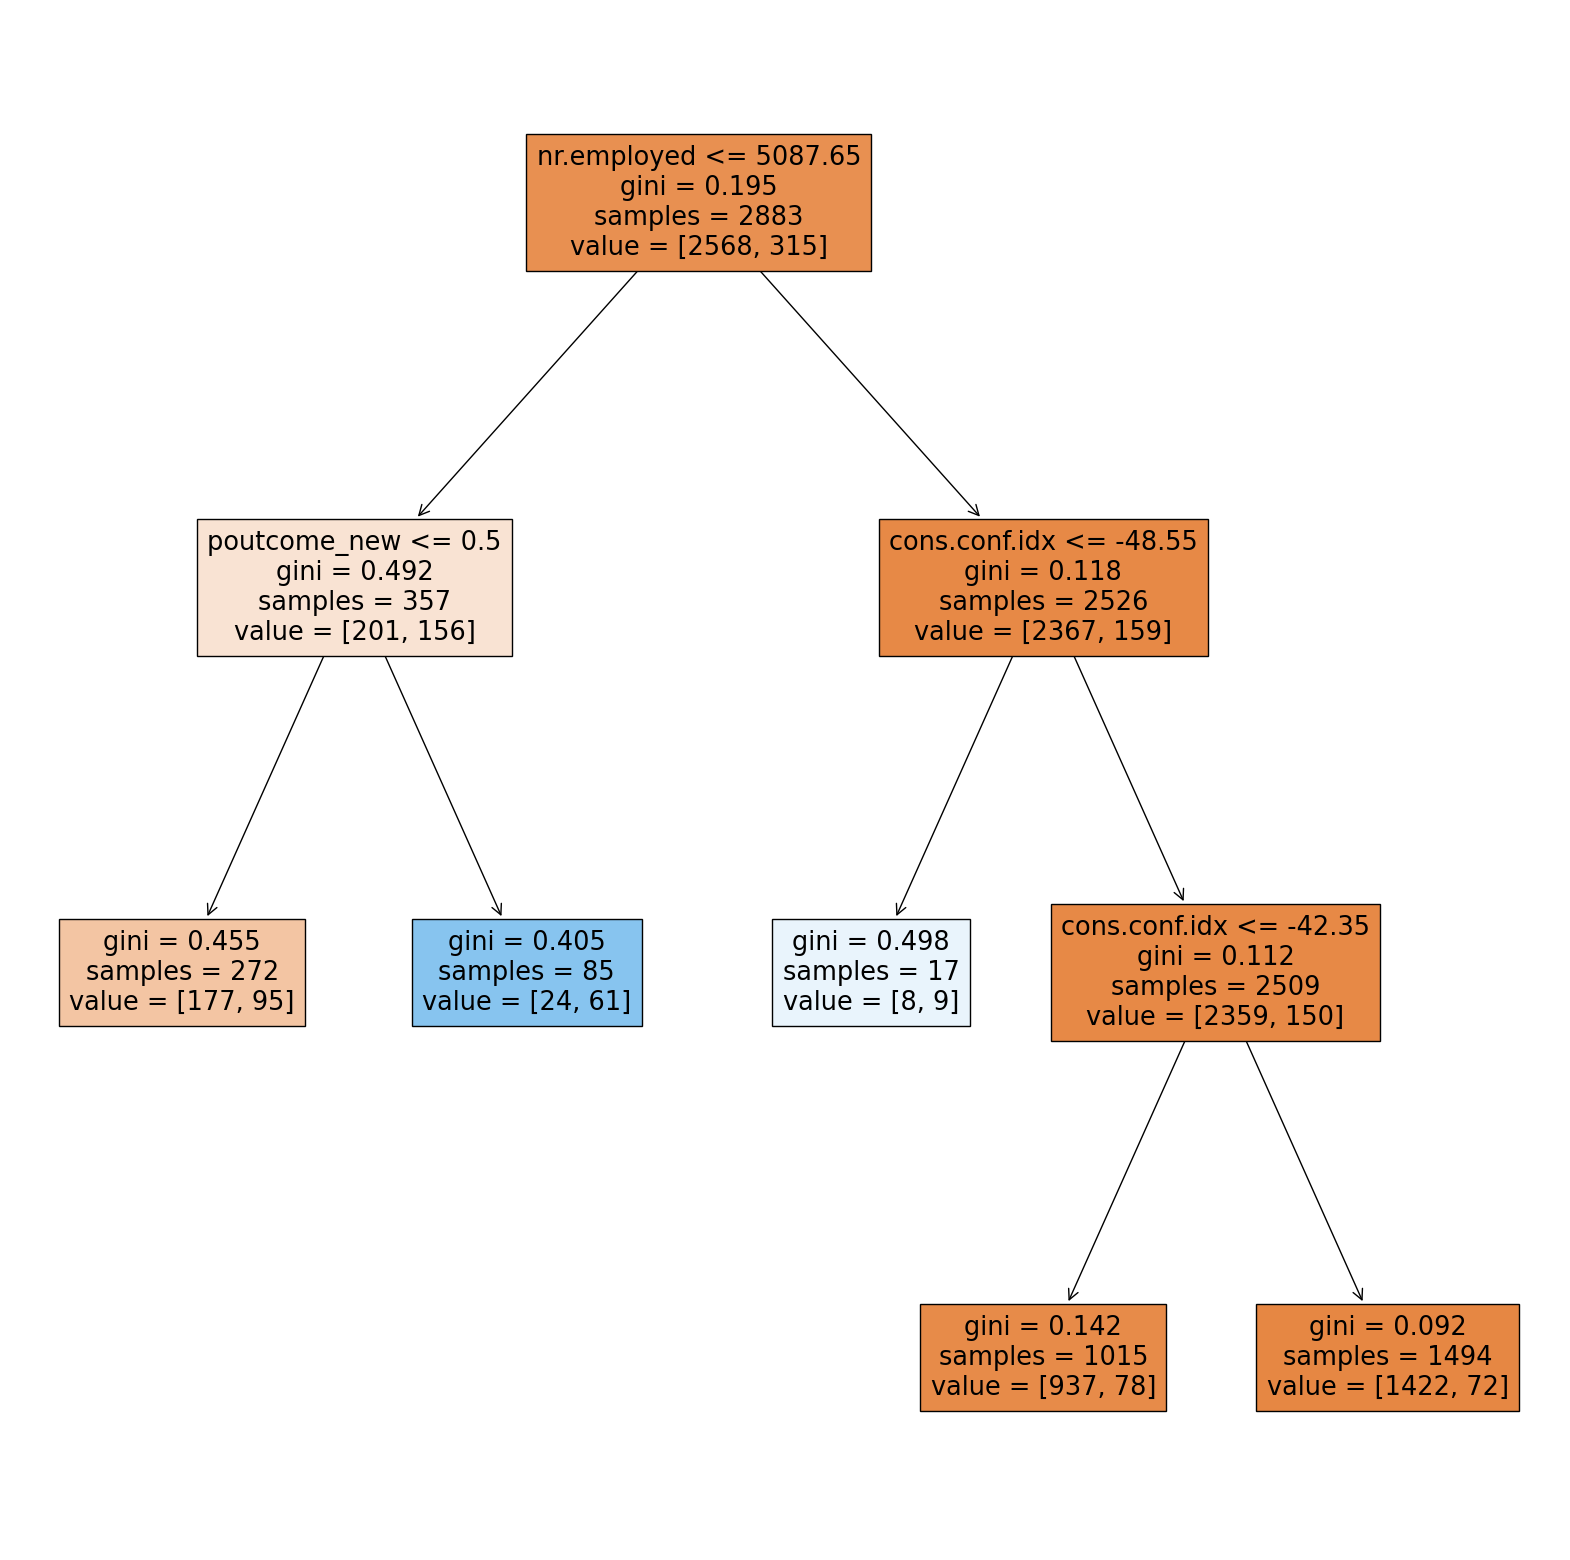

In [22]:
# Importing the sklearn implementation
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.linspace(1, 50, 50, dtype='int16'),
    'min_samples_split': np.linspace(0.1, 1.0, 10),
}

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(criterion='gini', random_state=12345),
    param_grid=param_grid)


# Fit
gs.fit(X=X_train, y=y_train)

# Predicting the test set
y_pred = gs.predict(X_test)
plt.figure(figsize=(20, 20))
plot_tree(gs.best_estimator_, feature_names=X_final.columns, filled=True)
plt.show()

In [23]:
# Accuracy of the test set
gs.score(X=X_test, y=y_test)

0.901294498381877

In [24]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 0.1}

In [25]:
# Print 4dp of each feature importance
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(gs.best_estimator_.feature_names_in_)):
    print(f"{gs.best_estimator_.feature_names_in_[i]}: {gs.best_estimator_.feature_importances_[i]:.4f}")

age: 0.0000
emp.var.rate: 0.0000
cons.price.idx: 0.0000
cons.conf.idx: 0.0743
euribor3m: 0.0000
nr.employed: 0.7708
poutcome_new: 0.1548
